In [1]:
import os
import zipfile
import time
import requests

import pandas as pd
import numpy as np
import fiona
import geopandas as gpd

from sqlalchemy import create_engine

# set up database
user = os.environ.get('DB_USERNAME')
pwd = os.environ.get('DB_PASSWORD')
host = os.environ.get('DB_HOSTNAME')
port = os.environ.get('DB_PORT')

db_connection_url = f"postgres+psycopg2://{user}:{pwd}@{host}:{port}/geodemo"
engine = create_engine(db_connection_url)

In [2]:
ls = os.listdir('../data')

In [5]:
f = ls[3]

In [6]:
f

'OpenMapLocal_gpkg.zip'

In [20]:
zf = zipfile.ZipFile(f'../data/{f}')
[gpkg] = [f for f in zf.namelist() if f.split('.')[-1] == 'gpkg']
ozf = zf.open(gpkg)
layers = fiona.listlayers(ozf)
layers
gdf = gpd.read_file(zf.open(gpkg), driver='GPKG', layer='RailwayTrack')
gdf.to_postgis('railways', engine)

<AxesSubplot:>

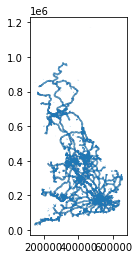

In [22]:
gdf.plot()

In [26]:
f = ls[-5]

In [27]:
zf = zipfile.ZipFile(f'../data/{f}')
[gpkg] = [f for f in zf.namelist() if f.split('.')[-1] == 'gpkg']
ozf = zf.open(gpkg)
layers = fiona.listlayers(ozf)
layers

['HydroNode', 'WatercourseLink']

In [28]:
gdf = gpd.read_file(zf.open(gpkg), driver='GPKG', layer='WatercourseLink')
gdf.to_postgis('rivers', engine)

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


<AxesSubplot:>

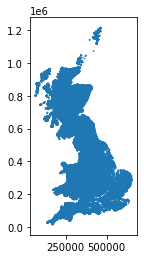

In [29]:
gdf.plot()

In [31]:
f = ls[-7]

In [32]:
f

'Strategi.zip'

In [33]:
zf = zipfile.ZipFile(f'../data/{f}')

In [34]:
fs = [f for f in zf.namelist() if 'coastline' in f]

In [36]:
fs

['strtgi_essh_gb/data/coastline.dbf',
 'strtgi_essh_gb/data/coastline.prj',
 'strtgi_essh_gb/data/coastline.shp',
 'strtgi_essh_gb/data/coastline.shx']

In [45]:
gdf = gpd.read_file(f'zip://../data/{f}!{fs[2]}', driver='ESRI Shapefile')

In [48]:
gdf.to_postgis('coastline', engine)

<AxesSubplot:>

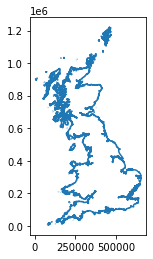

In [47]:
gdf.plot()

In [53]:
f = ls[11]
f

'OpenRoads_gpkg.zip'

In [54]:
zf = zipfile.ZipFile(f'../data/{f}')

In [55]:
[gpkg] = [f for f in zf.namelist() if f.split('.')[-1] == 'gpkg']

In [56]:
gpkg

'data/oproad_gb.gpkg'

In [57]:
layers = fiona.listlayers(zf.open(gpkg))
layers

['RoadLink', 'RoadNode', 'MotorwayJunction']

In [64]:
gdf = gpd.read_file(zf.open(gpkg), layer=layers[1], driver='gpkg')

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [65]:
gdf.to_postgis('roadnodes', engine, if_exists='replace')

<AxesSubplot:>

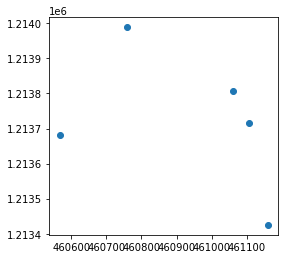

In [66]:
gdf.head().plot()